In [123]:
import psycopg2
import psycopg2.extras
import csv
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import scipy
from scipy.stats import kstest, ks_2samp
from scipy import stats
import statsmodels.api as sm
#set options for displaying all the columns and rows
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)


In [124]:
df = pd.read_csv('/Users/anastasiyaayala/Desktop/bootcamps_edu/data/combined_skills.csv')

In [125]:
#remove ',' from program cost and salary 
df = df.applymap(lambda x: x.replace(',', '') if isinstance(x, str) else x)

In [126]:
#replace 'self-paced' option for 280 day, we did research online, students have access to resources for up to 40 weeks
df['course_length'] = df['course_length'].apply(lambda x: x.replace('Self-paced','280') if isinstance(x, str) else x)

In [127]:
df.columns

Index(['school_name', 'campus_location', 'program_name', 'program_cost',
       'java', 'csharp_net', 'html', 'css', 'javascript', 'es6', 'jquery',
       'nodejs', 'reactjs', 'redux', 'heroku', 'sql', 'mysql', 'postgress',
       'mongodb', 'firebase', 'git', 'spring', 'api', 'applied_stats',
       'python', 'r', 'regression', 'classification', 'clustering',
       'time_series_analysis', 'anomaly_detection', 'language_processing',
       'machine_learning', 'advanced_topics', 'story_telling_with_data',
       'domain_expertise_development', 'reporting_start', 'reporting_end',
       'course_length', 'graduates_included', 'graduated_ontime',
       'intend_infield_employment', 'employed_infield_90days',
       'employed_infield_180days', 'not_seeking_infield_90days',
       'not_seeking_infield_180days', 'still_seeking_infield_90days',
       'still_seeking_infield_180days', 'median_annual_salary90days',
       'median_annual_salary180days', 'under70K_90days', 'under70K_180days',
   

In [128]:
#columns that need to be converted to floats
cols_tofloat = ['program_cost','median_annual_salary90days','median_annual_salary180days','course_length']
df[cols_tofloat] = df[cols_tofloat].astype(float)

In [129]:
#-1 used to be placeholder for NaN, replaced it back with NaN
df = df.replace({-1:np.nan})

### Exploratory Data Analysis

In [130]:
#seaborn style setting
sns.set()

In [131]:
#check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   school_name                    67 non-null     object 
 1   campus_location                67 non-null     object 
 2   program_name                   67 non-null     object 
 3   program_cost                   67 non-null     float64
 4   java                           61 non-null     float64
 5   csharp_net                     61 non-null     float64
 6   html                           61 non-null     float64
 7   css                            61 non-null     float64
 8   javascript                     61 non-null     float64
 9   es6                            61 non-null     float64
 10  jquery                         61 non-null     float64
 11  nodejs                         61 non-null     float64
 12  reactjs                        61 non-null     float

In [132]:
#statistics analysis
df.describe()

,program_cost,java,csharp_net,html,css,javascript,es6,jquery,nodejs,reactjs,redux,heroku,sql,mysql,postgress,mongodb,firebase,git,spring,api,applied_stats,python,r,regression,classification,clustering,time_series_analysis,anomaly_detection,language_processing,machine_learning,advanced_topics,story_telling_with_data,domain_expertise_development,course_length,graduates_included,graduated_ontime,intend_infield_employment,employed_infield_90days,employed_infield_180days,not_seeking_infield_90days,not_seeking_infield_180days,still_seeking_infield_90days,still_seeking_infield_180days,median_annual_salary90days,median_annual_salary180days,under70K_90days,under70K_180days,salary_70K_80K_90days,salary_70K_80K_180days,salary_80K_90K_90days,salary_80K_90K_180days,over90K_90days,over90K_180days
count,67.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,60.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,16859.925373,0.459016,0.426230,0.770492,0.770492,0.770492,0.114754,0.163934,0.163934,0.278689,0.114754,0.032787,0.688525,0.131148,0.229508,0.114754,0.032787,0.327869,0.133333,0.081967,0.081967,0.278689,0.016393,0.081967,0.081967,0.081967,0.081967,0.081967,0.081967,0.081967,0.081967,0.098361,0.081967,161.552239,50.208955,85.122388,96.774627,60.925373,79.619403,2.126866,2.397015,33.732836,14.768657,68954.388060,71595.492537,52.870149,54.335821,13.307463,12.598507,10.559701,10.805970,23.050746,21.749254
std,5787.568148,0.502453,0.498632,0.424006,0.424006,0.424006,0.321370,0.373288,0.373288,0.452075,0.321370,0.179556,0.466940,0.340363,0.424006,0.321370,0.179556,0.473333,0.342803,0.276591,0.276591,0.452075,0.128037,0.276591,0.276591,0.276591,0.276591,0.276591,0.276591,0.276591,0.276591,0.300273,0.276591,74.766563,35.037010,12.652701,5.448529,14.025089,11.349666,4.576905,4.834659,14.172502,9.438384,29469.515454,23598.960114,33.760036,33.282513,14.067977,13.520114,11.816463,11.282554,32.429034,31.676362
min,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,77.000000,3.000000,48.100000,71.700000,26.900000,42.800000,0.000000,0.000000,6.800000,0.000000,0.000000,37440.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15500.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,21.000000,80.950000,94.950000,51.350000,74.250000,0.000000,0.000000,23.950000,7.100000,59500.000000,57060.000000,26.350000,27.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16500.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,120.000000,42.000000,89.300000,100.000000,61.000000,81.500000,0.000000,0.000000,33.300000,15.400000,65000.000000,65000.000000,54.500000,59.000000,10.000000,9.700000,7.300000,7.100000,5.600000,7.500000
75%,22500.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,

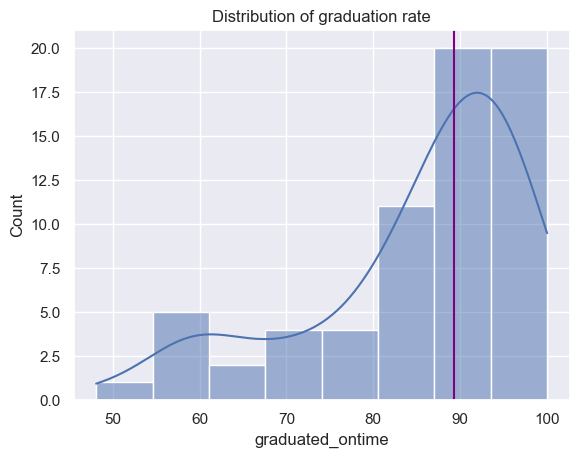

In [133]:
#distribution of graduation rate
xmedian = np.median(df['graduated_ontime'])
sns.histplot(data = df, x = 'graduated_ontime', kde=True)
plt.axvline(xmedian, c = "purple")
plt.title("Distribution of graduation rate");

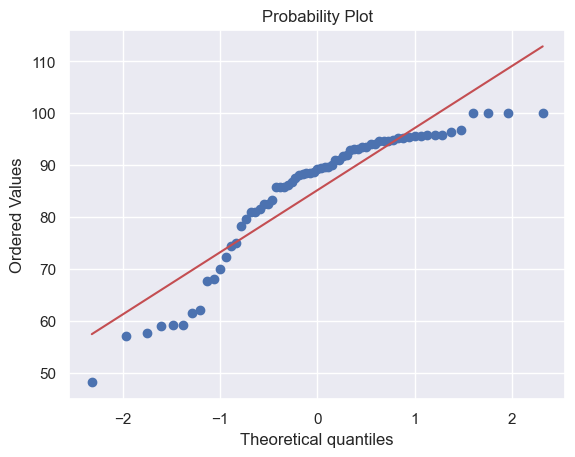

In [134]:
#confirm distribution of graduation rate with QQ-Plot
scipy.stats.probplot(df['graduated_ontime'].dropna(),dist='norm',plot=sns.mpl.pyplot);

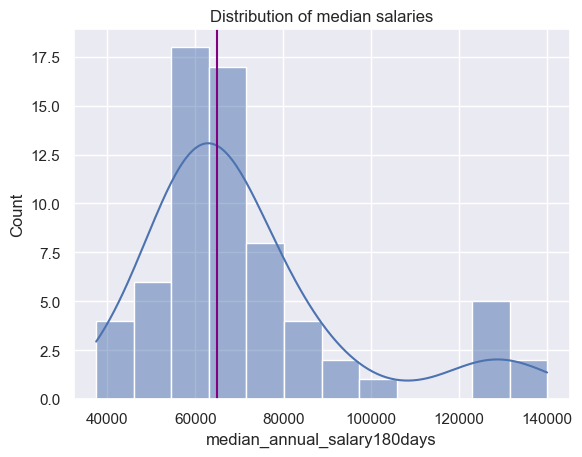

In [135]:
#distribution of median salary 180 days after graduation
xmedian = np.median(df['median_annual_salary180days'])
sns.histplot(data = df, x = 'median_annual_salary180days',kde=True)
plt.axvline(xmedian,c = "purple")
plt.title("Distribution of median salaries");

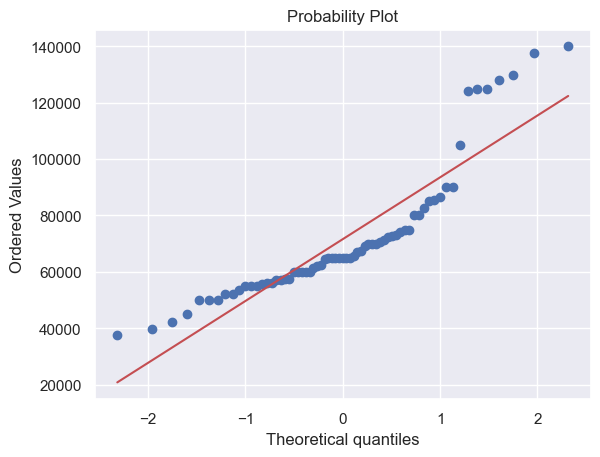

In [136]:
#confirm distribution of median salaries 180 days after graduation
scipy.stats.probplot(df['median_annual_salary180days'].dropna(),dist='norm',plot=sns.mpl.pyplot);

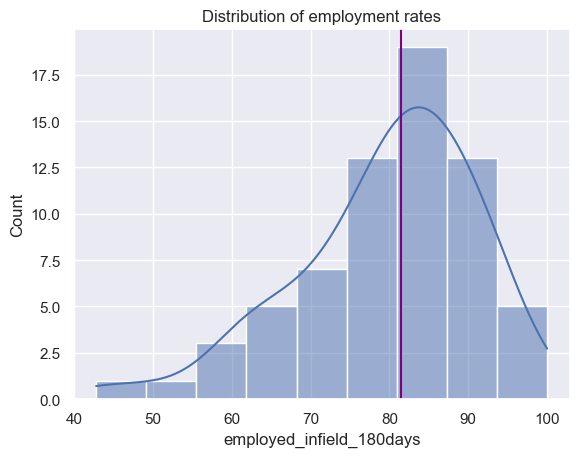

In [137]:
#distribution of employmet rate 180 days after graduation
xmedian = np.median(df['employed_infield_180days'])
sns.histplot(data = df, x = 'employed_infield_180days',kde=True)
plt.axvline(xmedian,c = "purple")
plt.title("Distribution of employment rates");

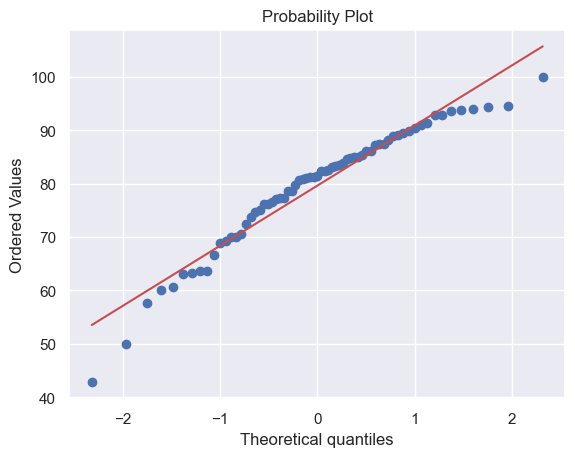

In [138]:
#confirm distribution of employment rate with QQ-plot
scipy.stats.probplot(df['employed_infield_180days'].dropna(),dist='norm',plot=sns.mpl.pyplot);

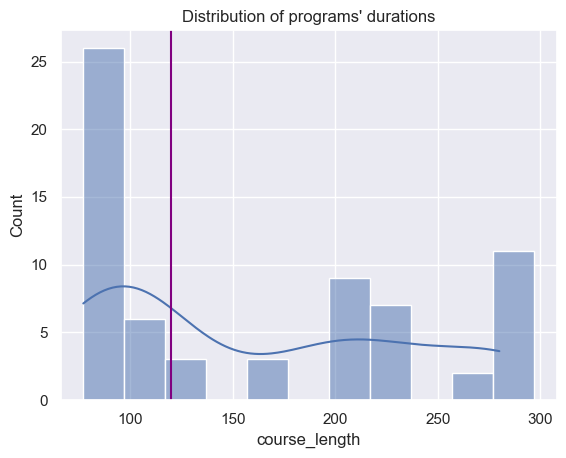

In [139]:
#distribution of programs' lengths
xmedian = np.median(df['course_length'])
sns.histplot(data = df, x = 'course_length',kde=True, binwidth=20)
plt.axvline(xmedian,c = "purple")
plt.title("Distribution of programs' durations");

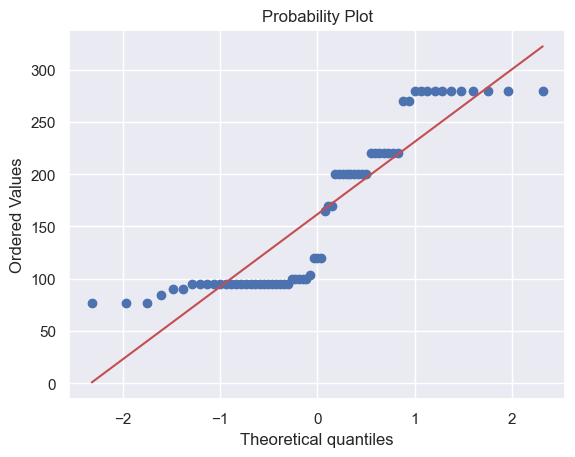

In [140]:
scipy.stats.probplot(df['course_length'].dropna(),dist='norm',plot=sns.mpl.pyplot);

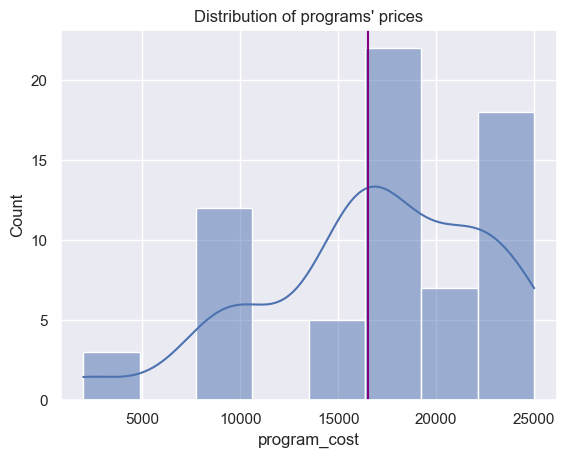

In [141]:
#distribution of programs' prices
xmedian = np.median(df['program_cost'])
sns.histplot(data = df, x = 'program_cost',kde=True, bins=8)
plt.axvline(xmedian,c = "purple")
plt.title("Distribution of programs' prices");

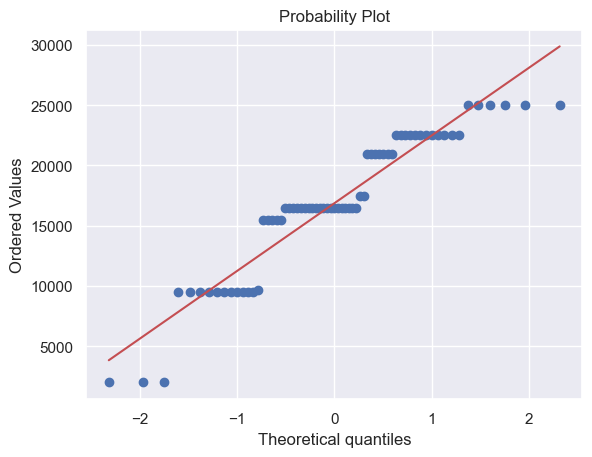

In [142]:
scipy.stats.probplot(df['program_cost'].dropna(),dist='norm',plot=sns.mpl.pyplot);

### KS test

### The null hypothesis: There are no significant difference between median salaries distributions for remote and onsite positions

In [143]:
# Subset data by program location
remote = ['Online','Remote']
onsite = ['Boston', 'Chicago', 'Cincinnati', 'Cleveland', 'Columbus', 'Dallas', 'Los Angeles', 'New York', 'Philadelphia', 
         'Pittsburgh', 'Salt Lake City', 'San Antonio','San Antonio - Vogue', 'Tokyo', 'Toronto', 'Wilmington']
location1 = df[df['campus_location'].isin(remote)]['median_annual_salary180days']
location2 = df[df['campus_location'].isin(onsite)]['median_annual_salary180days']

# Perform KS test
statistic, p_value = ks_2samp(location1, location2)


print("KS test statistic:", statistic)
print("p-value:", p_value)

KS test statistic: 0.29554263565891475
p-value: 0.10495022255796234


### H0: There are no significant difference between median salaries distributions for remote and onsite positions
### The p-value (0.10495022255796234) > 0.05, we fail to reject the null hypothesis.
### There is no signicant influence of location on median salary outcome.


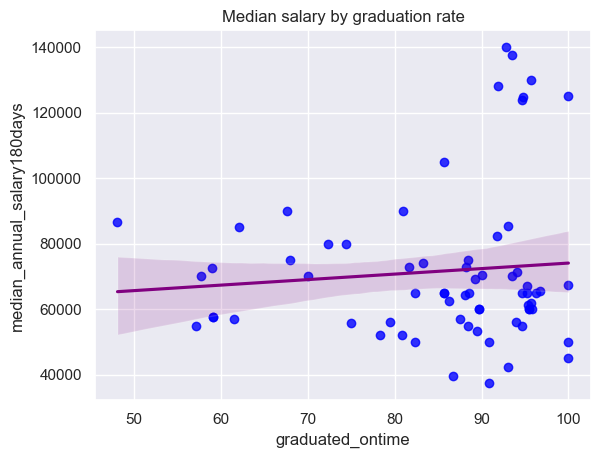

In [144]:
sns.regplot(data = df, x='graduated_ontime',y='median_annual_salary180days', scatter_kws={'color': 'blue'}, line_kws={'color':'purple'})
plt.title('Median salary by graduation rate');

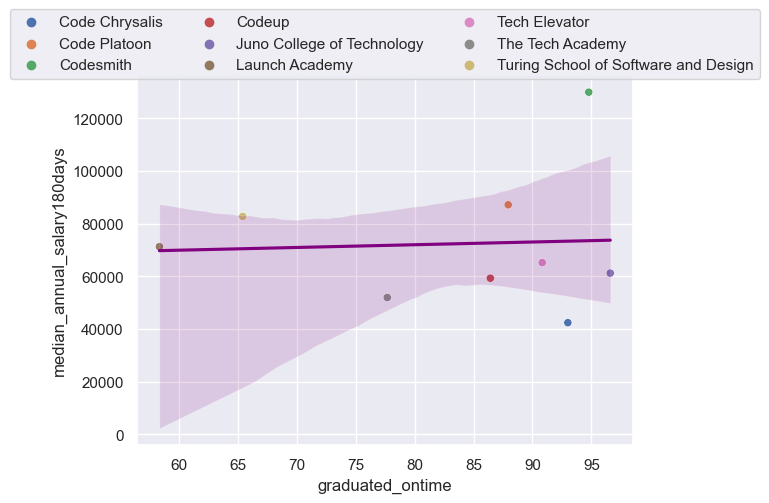

In [145]:
mean_grad_rate = df.groupby('school_name')['graduated_ontime'].mean().reset_index()
avg_medsalary = df.groupby('school_name')['median_annual_salary180days'].mean().reset_index()
merged = pd.merge(mean_grad_rate,avg_medsalary, on='school_name')
sns.scatterplot(data=merged, x='graduated_ontime',y='median_annual_salary180days',hue='school_name', legend='auto')
sns.regplot(data=merged, x='graduated_ontime', y='median_annual_salary180days', scatter=False, color='purple')
legend = plt.legend(bbox_to_anchor=(0.5, 1.2), loc='upper center', ncol=3);


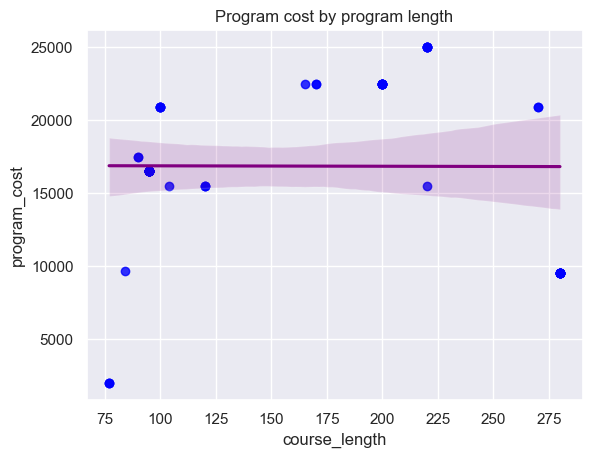

In [146]:
sns.regplot(data = df, x='course_length',y='program_cost', scatter_kws={'color': 'blue'}, line_kws={'color':'purple'})
plt.title('Program cost by program length');

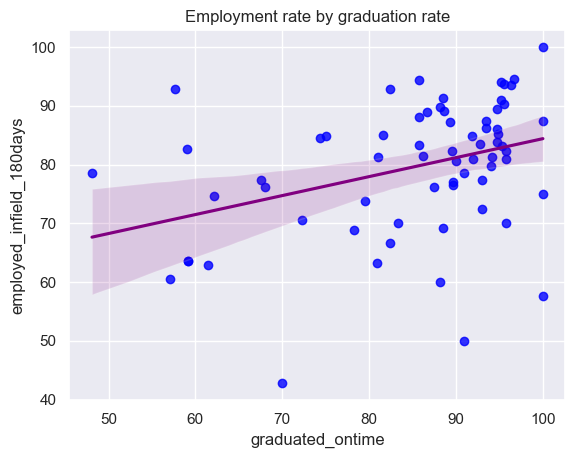

In [147]:
sns.regplot(data = df, x='graduated_ontime',y='employed_infield_180days', scatter_kws={'color': 'blue'}, line_kws={'color':'purple'})
plt.title('Employment rate by graduation rate');

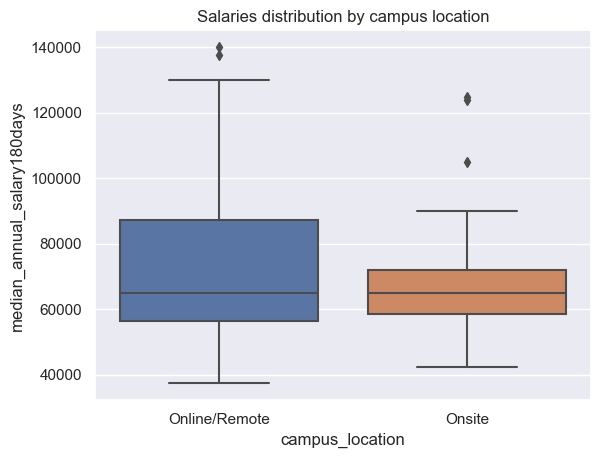

In [148]:
sns.boxplot(x= df['campus_location'].apply(lambda x: "Online/Remote" if x in ['Online','Remote'] else 'Onsite'), y = df['median_annual_salary180days'])
plt.title('Salaries distribution by campus location');

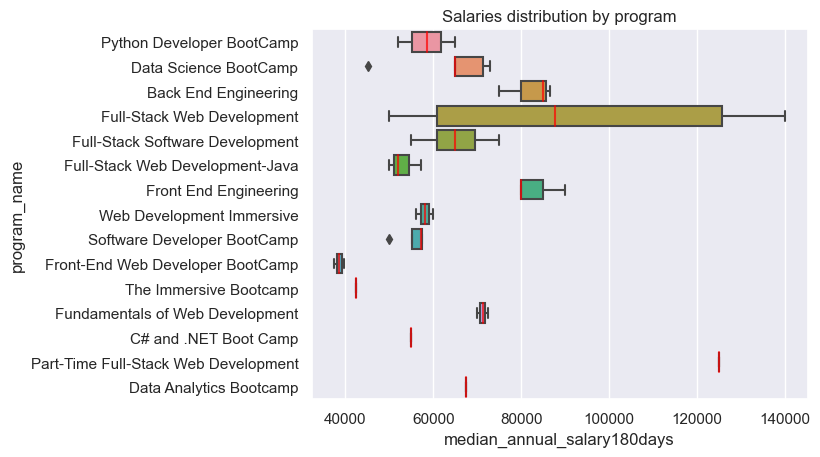

In [149]:
sns.boxplot(x = df['median_annual_salary180days'], y = df['program_name'], medianprops=dict(color="red", alpha=0.7))
plt.title('Salaries distribution by program');

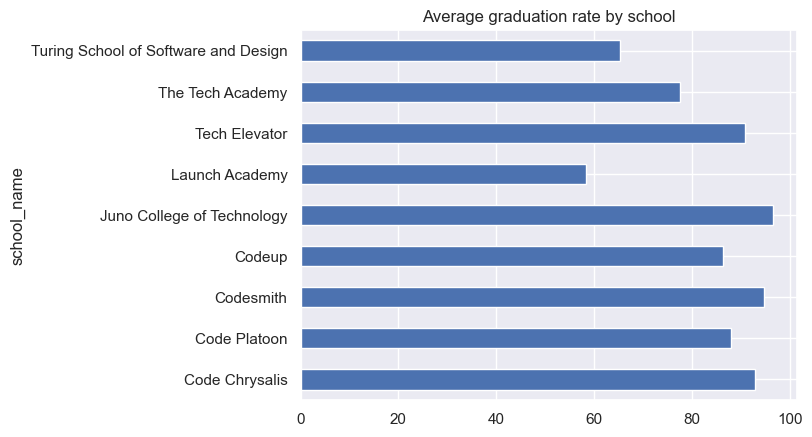

In [150]:

avg_graduation = df.groupby('school_name')['graduated_ontime'].mean()
avg_graduation.plot(kind ='barh')
plt.title('Average graduation rate by school');

## Analysis of Skills influence on the programs' outcomes

In [151]:
# select just the columns containing skills
cols =  ['java', 'csharp_net', 'html', 'css', 'javascript', 'es6', 'jquery',
       'nodejs', 'reactjs', 'redux', 'heroku', 'sql', 'mysql', 'postgress',
       'mongodb', 'firebase', 'git', 'spring', 'api', 'applied_stats',
       'python', 'r', 'regression', 'classification', 'clustering',
       'time_series_analysis', 'anomaly_detection', 'language_processing',
       'machine_learning', 'advanced_topics', 'story_telling_with_data',
       'domain_expertise_development']
# create new dataframe that just contains the skills
skills_df = df[cols]

In [152]:
skills_count = pd.DataFrame(skills_df.apply(lambda x: x.sum()))

# sort skills occurencies in descending order
skills_count.rename(columns= { 0:'skill_freq'},inplace=True)
skills_count = skills_count.sort_values(['skill_freq'],ascending=False)


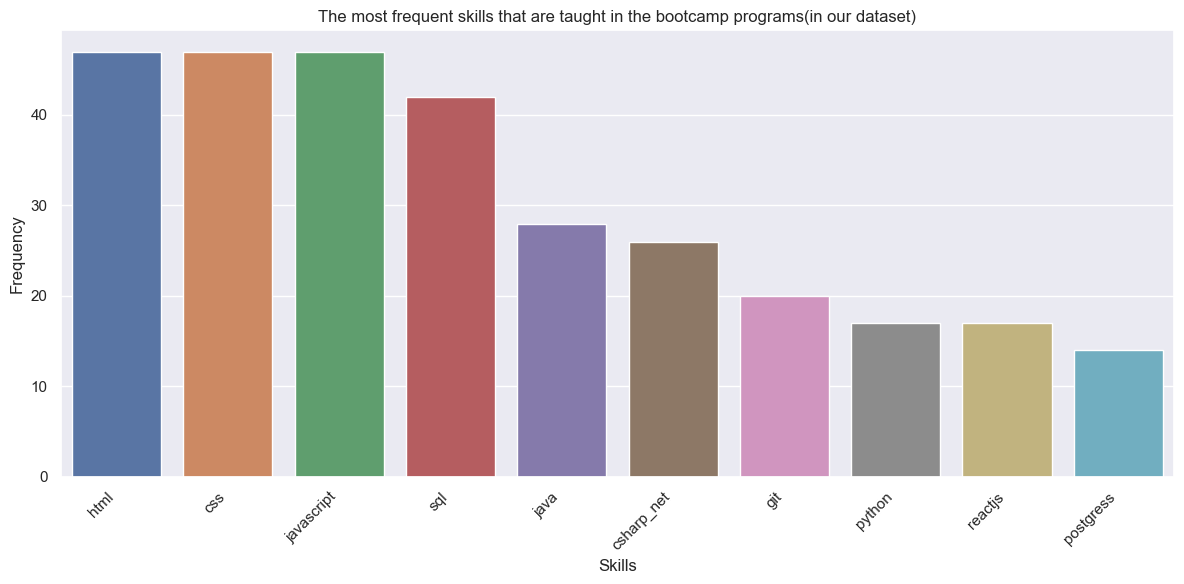

In [153]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=skills_count[:10], x=skills_count[:10].index, y=skills_count[:10]['skill_freq'], ax=ax)
ax.set_title("The most frequent skills that are taught in the bootcamp programs(in our dataset)")
ax.set_xlabel("Skills")
ax.set_ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout();


In [187]:
skills_columns = ['school_name','program_name','java', 'csharp_net', 'html', 'css', 'javascript', 'es6', 'jquery', 'nodejs', 'reactjs', 'redux', 'heroku', 'sql', 'mysql', 'postgress', 'mongodb', 'firebase', 'git', 'spring', 'api', 'applied_stats', 'python', 'r', 'regression', 'classification', 'clustering', 'time_series_analysis', 'anomaly_detection', 'language_processing', 'machine_learning', 'advanced_topics', 'story_telling_with_data', 'domain_expertise_development']
salary_columns = ['employed_infield_180days', 'median_annual_salary180days']

# Subset the dataframe to include only the relevant columns
df_subset = df[skills_columns + salary_columns]

# Create a new column with a list of present skills for each row
df_subset['Skill_Set'] = df_subset.apply(lambda row: [skill for skill in skills_columns if row[skill] == 1], axis=1)

# # Calculate the total number of skills present in the program for each row
# df_subset['Total_Skills'] = df_subset['Skill_Set'].apply(len)


/var/folders/kc/j4ss26096jv9xkwkcr7z36kr0000gn/T/ipykernel_89681/2539504802.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['Skill_Set'] = df_subset.apply(lambda row: [skill for skill in skills_columns if row[skill] == 1], axis=1)


In [188]:
unique_lists = [set(x) for x in df_subset['Skill_Set'].apply(frozenset).unique()]
def get_index (val):
    return chr(unique_lists.index(set(val)) + 65)
df_subset['skill_group'] = df_subset['Skill_Set'].apply(get_index)

/var/folders/kc/j4ss26096jv9xkwkcr7z36kr0000gn/T/ipykernel_89681/754090921.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['skill_group'] = df_subset['Skill_Set'].apply(get_index)


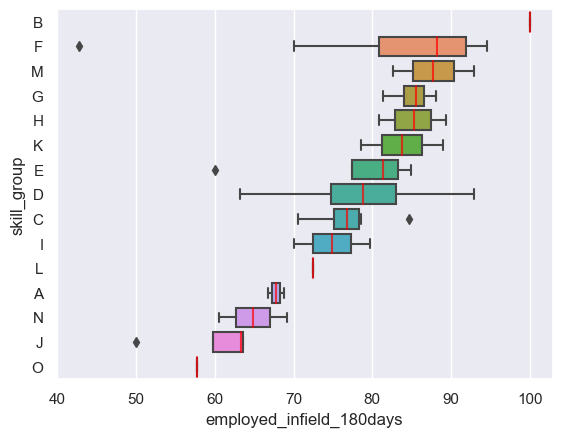

In [189]:
medians = df_subset.groupby('skill_group')['employed_infield_180days'].median()
medians_sorted = medians.sort_values(ascending=False)

# Sort the DataFrame based on median values
df_sorted = df_subset.set_index('skill_group').loc[medians_sorted.index].reset_index()

# Create the boxplot
sns.boxplot(x=df_sorted['employed_infield_180days'], y=df_sorted['skill_group'], medianprops=dict(color="red", alpha=0.7));


In [190]:
top_set1 = list(df_sorted.loc[df_sorted['skill_group'] == 'B', 'Skill_Set'])
top_set1 = top_set1[0]

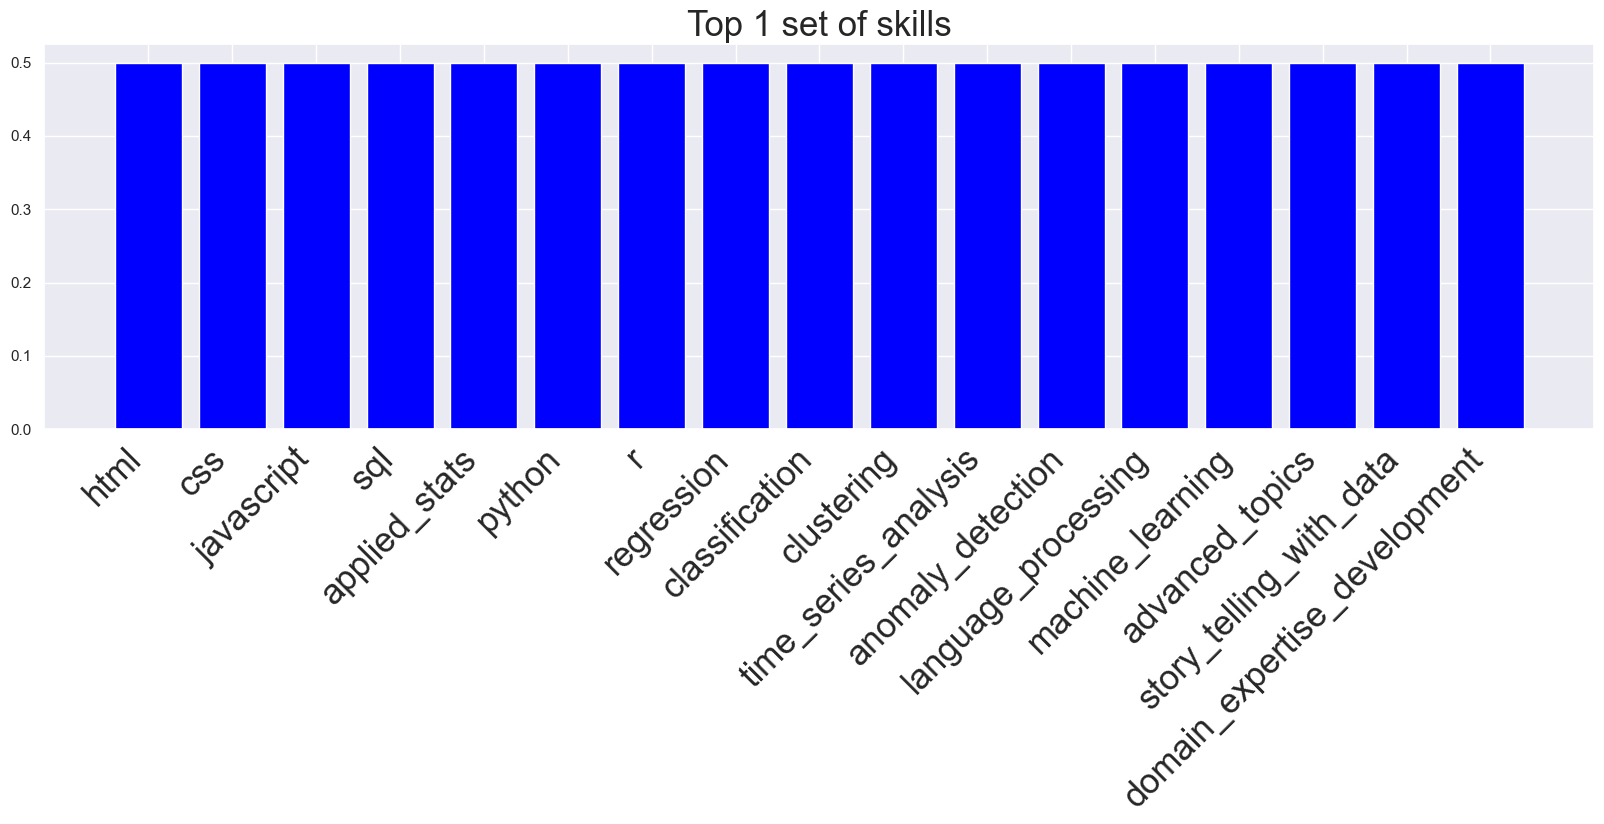

In [191]:
plt.figure(figsize=(20,5))
plt.bar(top_set1, height =0.5, color = 'blue')
plt.xticks(rotation=45, fontsize = 25, ha='right')
plt.title("Top 1 set of skills", fontsize = 25)
plt.show()

In [192]:
top_set2 = list(df_sorted.loc[df_sorted['skill_group'] == 'F', 'Skill_Set'])
top_set2 = top_set2[0]

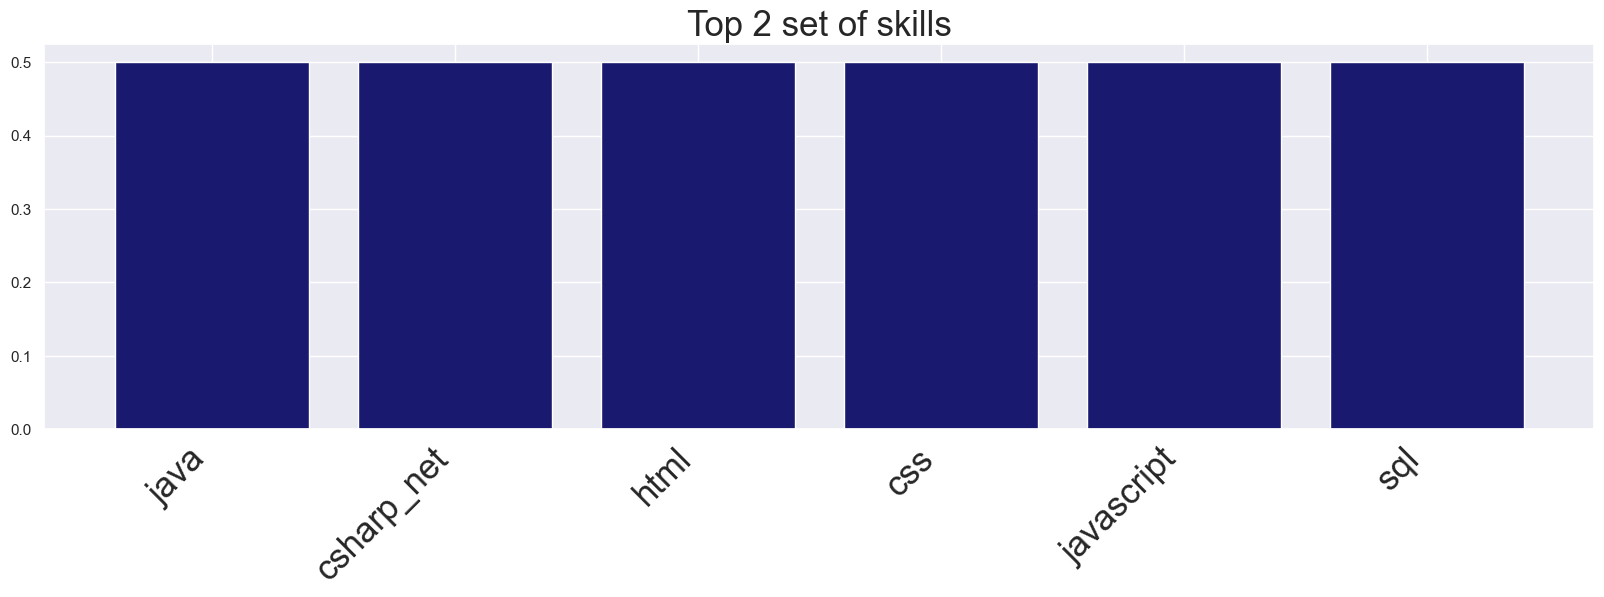

In [193]:
plt.figure(figsize=(20,5))
plt.bar(top_set2, height =0.5, color = 'midnightblue')
plt.xticks(rotation=45,fontsize = 25, ha='right')
plt.title("Top 2 set of skills", fontsize = 25)
plt.show()

In [194]:
top_set3 = list(df_sorted.loc[df_sorted['skill_group'] == 'M', 'Skill_Set'])
top_set3 = top_set3[0]

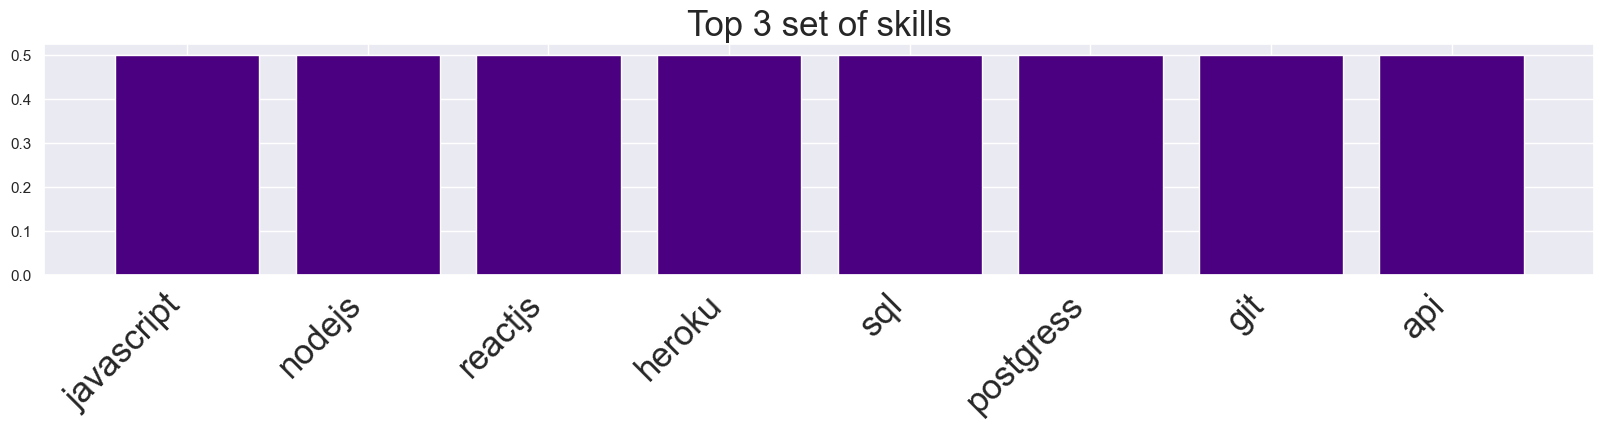

In [195]:
plt.figure(figsize=(20,3))
plt.bar(top_set3, height =0.5, color = 'indigo')
plt.xticks(rotation=45,fontsize = 25, ha='right')
plt.title("Top 3 set of skills", fontsize = 25)
plt.show()

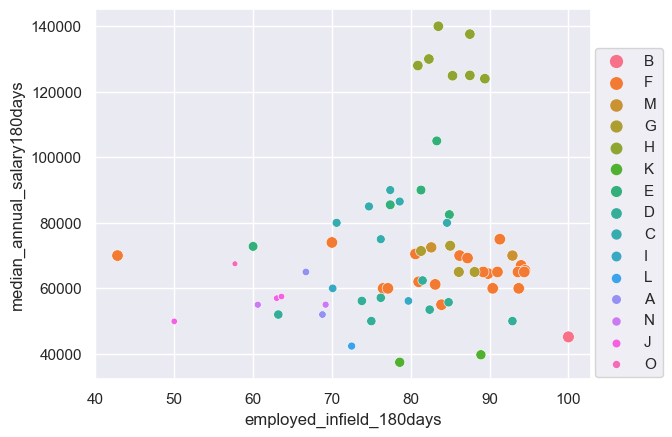

In [196]:
sns.scatterplot(data= df_sorted,x = 'employed_infield_180days', y = 'median_annual_salary180days', hue = 'skill_group', size = "skill_group")
plt.legend(bbox_to_anchor = (1.16,0.45),loc='right');

In [197]:
top_set_4 = list(df_sorted.loc[df_sorted['skill_group'] == 'H', 'Skill_Set'])
top_set_4 = top_set_4[0]

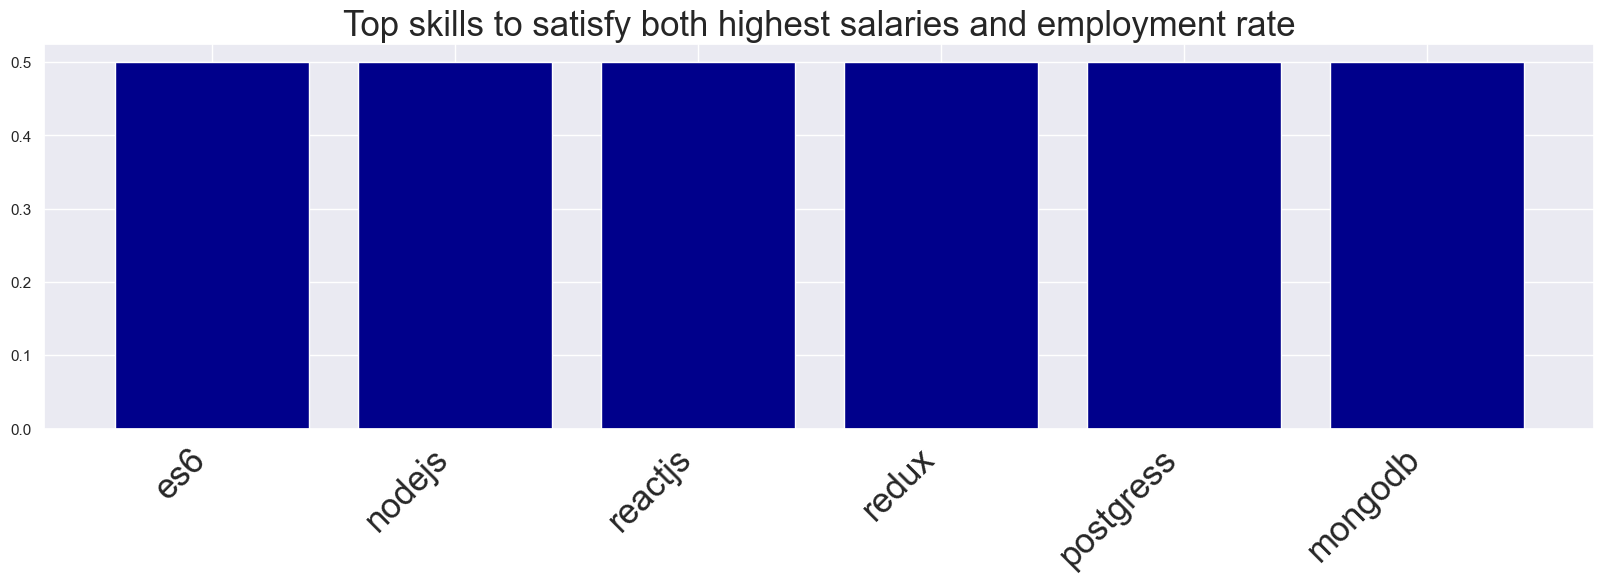

In [198]:
plt.figure(figsize=(20,5))
plt.bar(top_set_4, height =0.5, color = 'darkblue')
plt.xticks(rotation=45, fontsize = 25, ha='right')
plt.title("Top skills to satisfy both highest salaries and employment rate", fontsize = 25)
plt.show()

In [199]:
df2 = df[['program_cost','course_length', 'graduates_included', 'graduated_ontime',
       'intend_infield_employment', 'employed_infield_90days',
       'employed_infield_180days', 'not_seeking_infield_90days',
       'not_seeking_infield_180days', 'still_seeking_infield_90days',
       'still_seeking_infield_180days', 'median_annual_salary90days',
       'median_annual_salary180days', 'under70K_90days', 'under70K_180days',
       'salary_70K_80K_90days', 'salary_70K_80K_180days',
       'salary_80K_90K_90days', 'salary_80K_90K_180days', 'over90K_90days',
       'over90K_180days']]

### Defining skills' groups with clustering

In [200]:
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

In [201]:
X = df_subset[['java', 'csharp_net', 'html', 'css', 'javascript', 'es6', 'jquery', 'nodejs', 'reactjs', 'redux', 'heroku', 'sql', 'mysql', 'postgress', 'mongodb', 'firebase', 'git', 'spring', 'api', 'applied_stats', 'python', 'r', 'regression', 'classification', 'clustering', 'time_series_analysis', 'anomaly_detection', 'language_processing', 'machine_learning', 'advanced_topics', 'story_telling_with_data', 'domain_expertise_development']]
imputer = SimpleImputer()
X_imputed = imputer.fit_transform(X)
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_imputed)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [203]:
cluster_labels = kmeans.labels_

In [204]:
df_subset['cluster_skills'] = cluster_labels

/var/folders/kc/j4ss26096jv9xkwkcr7z36kr0000gn/T/ipykernel_89681/587278453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['cluster_skills'] = cluster_labels


In [207]:
df_subset.to_csv("/Users/anastasiyaayala/Desktop/bootcamps_edu/data/just_skills.csv",index=False)

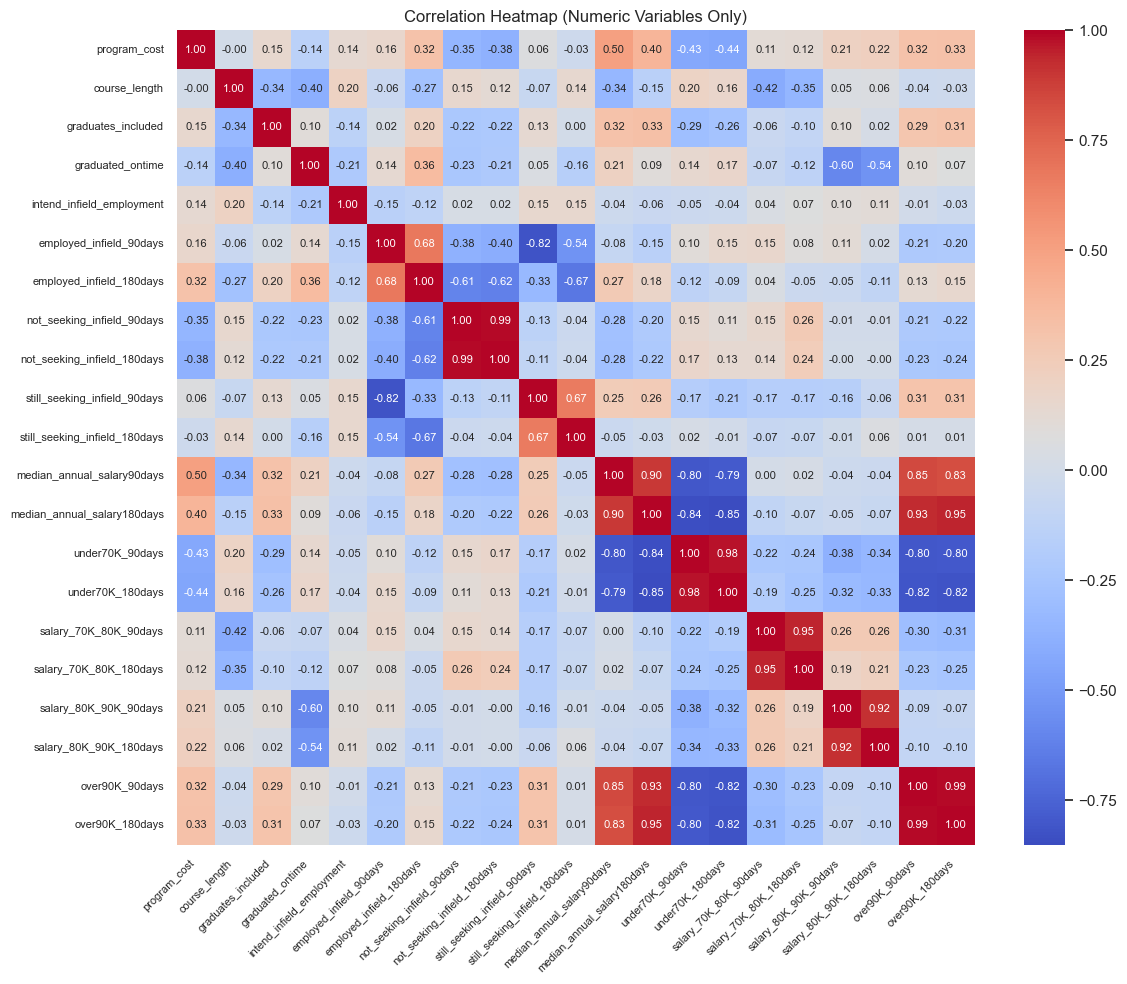

In [167]:

# Create a correlation matrix of the numeric columns
corr_matrix = df2.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"fontsize": 8})
plt.title('Correlation Heatmap (Numeric Variables Only)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()
plt.show()


KeyboardInterrupt: 

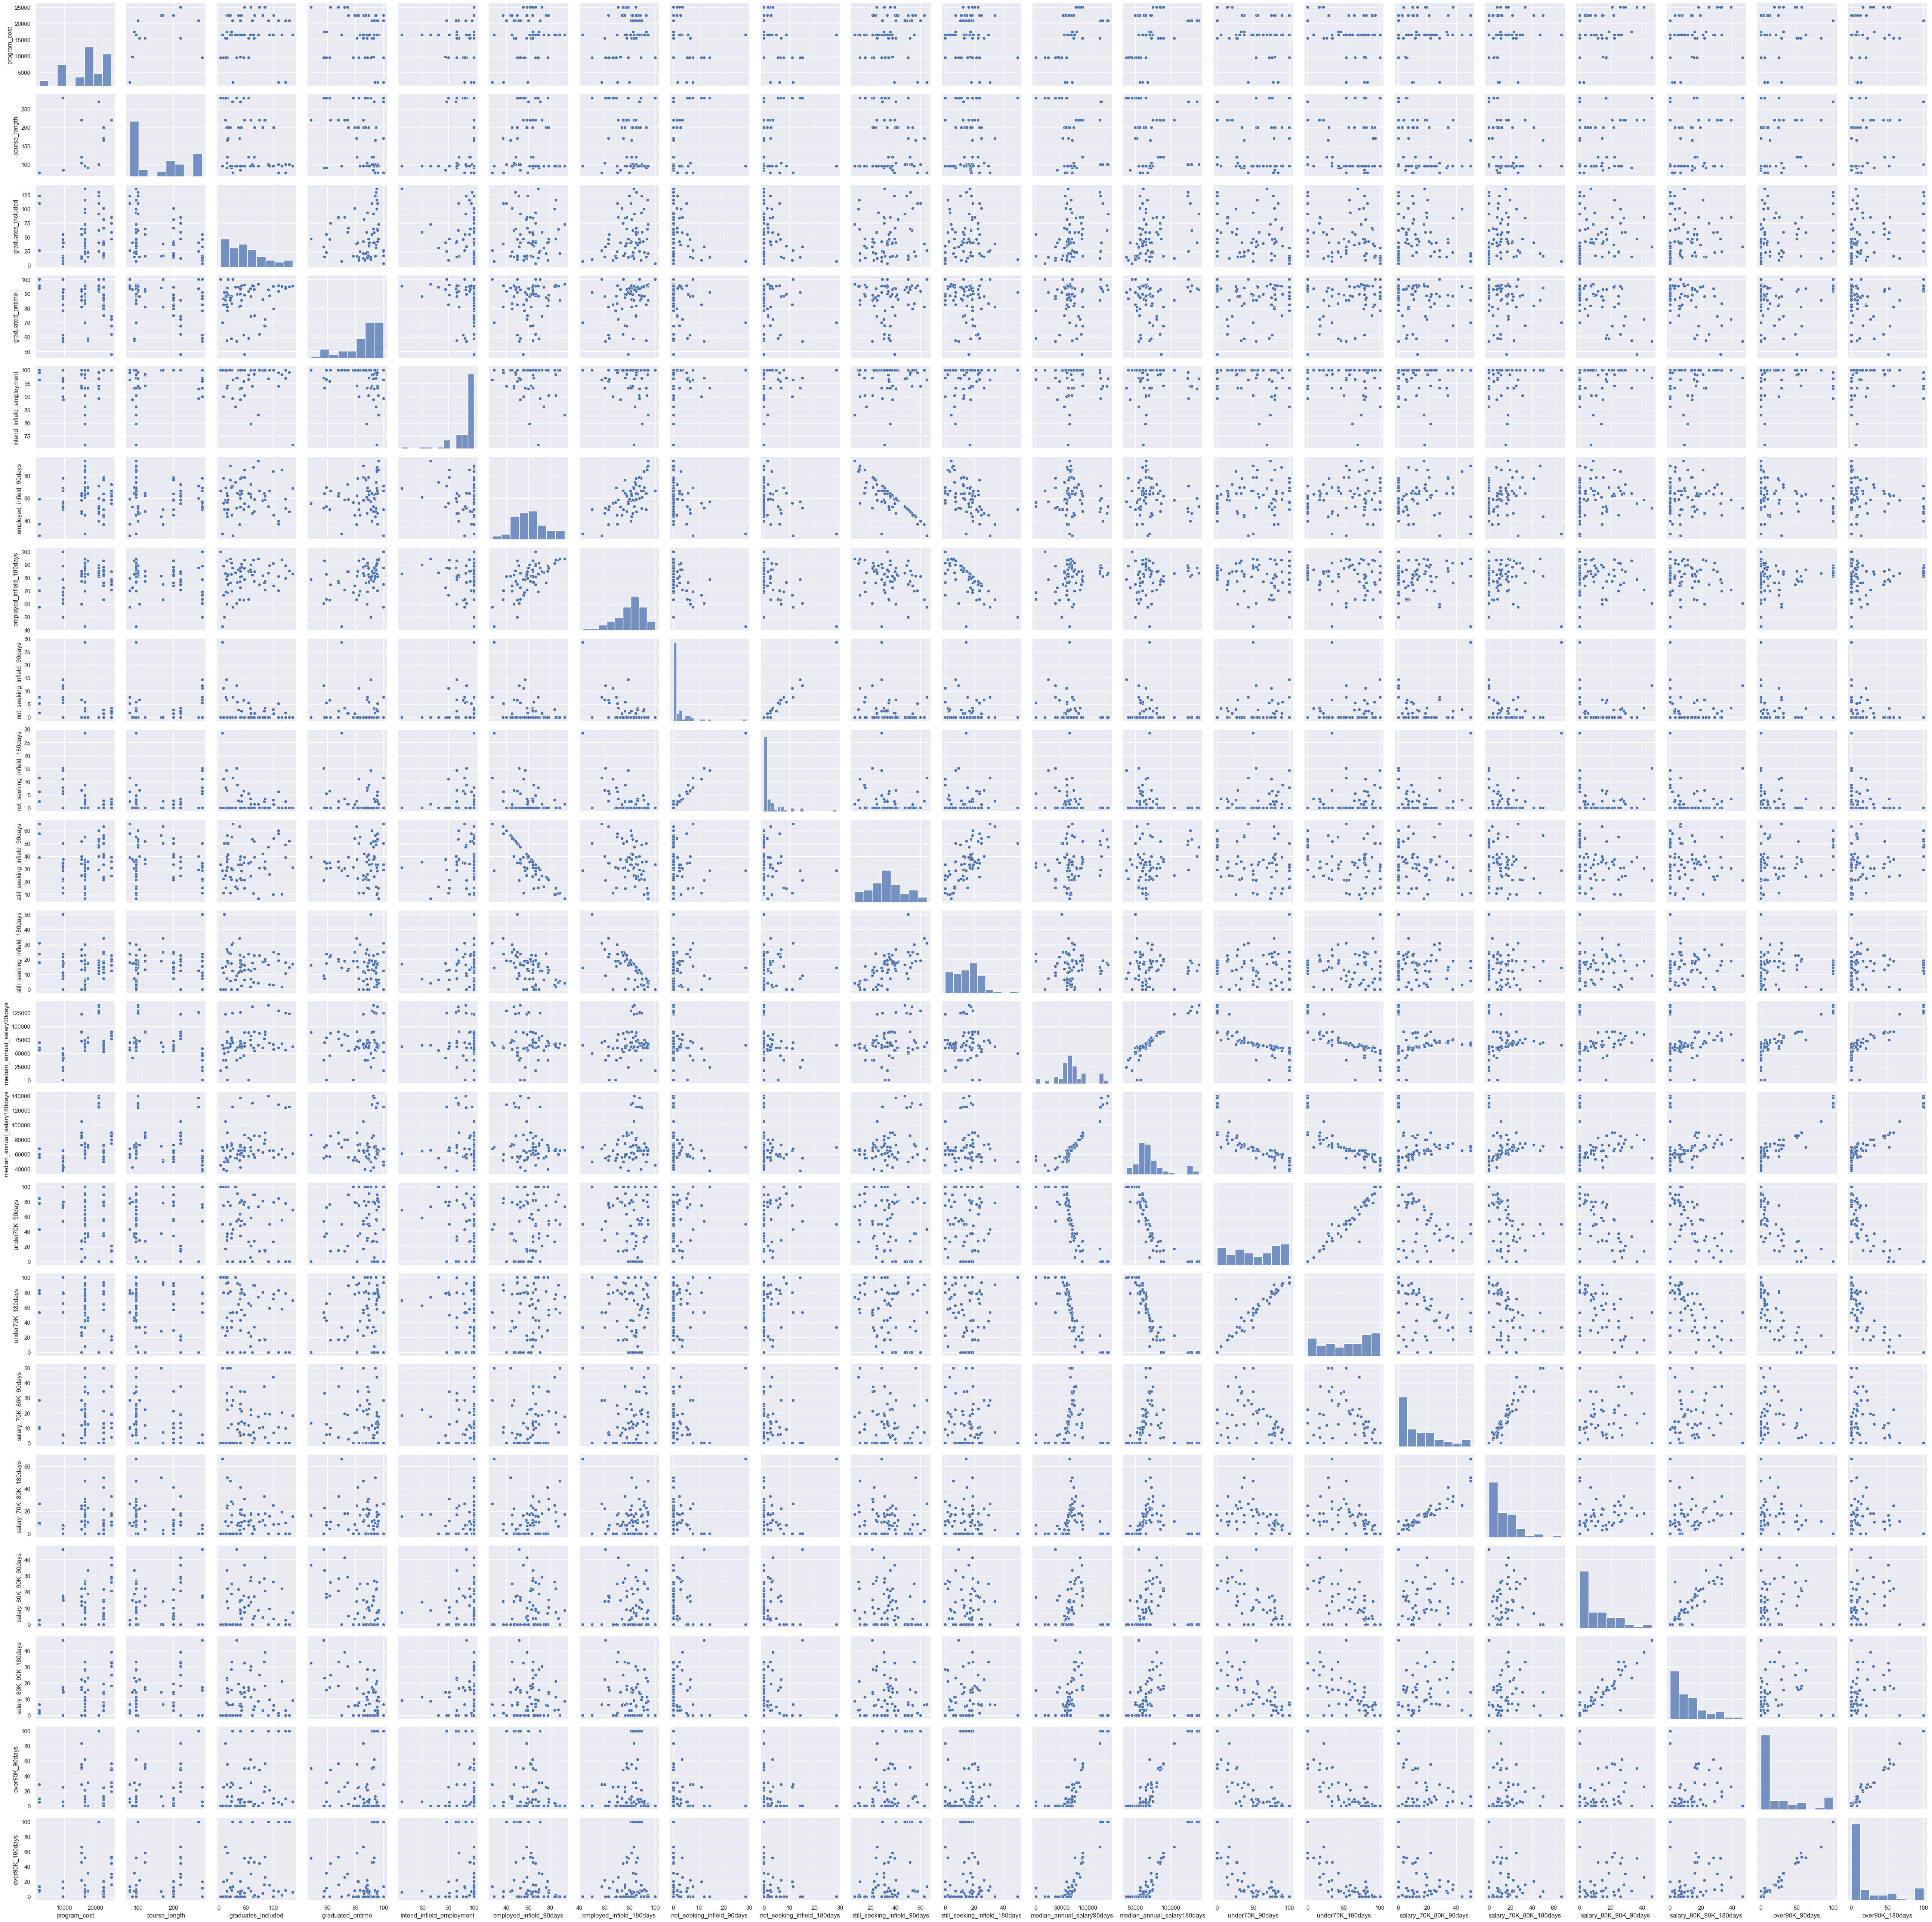

In [168]:
sns.pairplot(df2);

<AxesSubplot: >

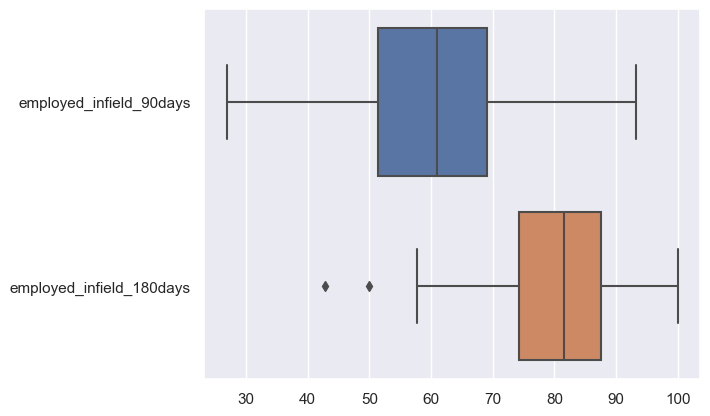

In [ ]:
sns.boxplot(data=df[["employed_infield_90days","employed_infield_180days"]], orient = 'h');

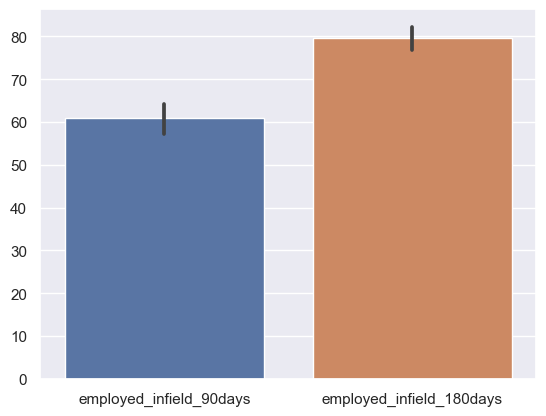

In [ ]:
sns.barplot(data=df[["employed_infield_90days", "employed_infield_180days"]]);

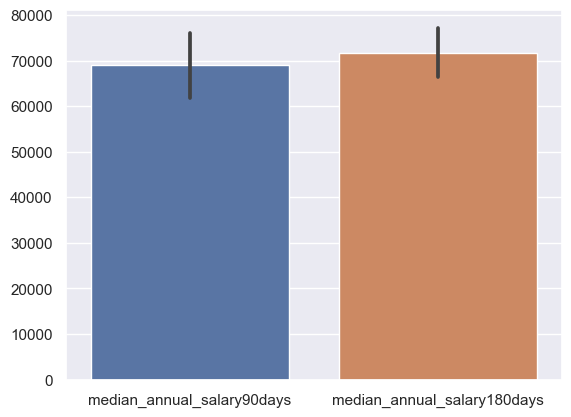

In [ ]:
sns.barplot(data=df[["median_annual_salary90days", "median_annual_salary180days"]]);

### Confirmatory Data Analysis

In [ ]:
q1 = df['median_annual_salary180days'].quantile(0.25)
q3 = df['median_annual_salary180days'].quantile(0.75)

iqr = q3 - q1
upper = q3 + (iqr * 2)
lower = q3 - (iqr * 2)

df = df[(df['median_annual_salary180days'] > lower) & (df['median_annual_salary180days'] < upper)]

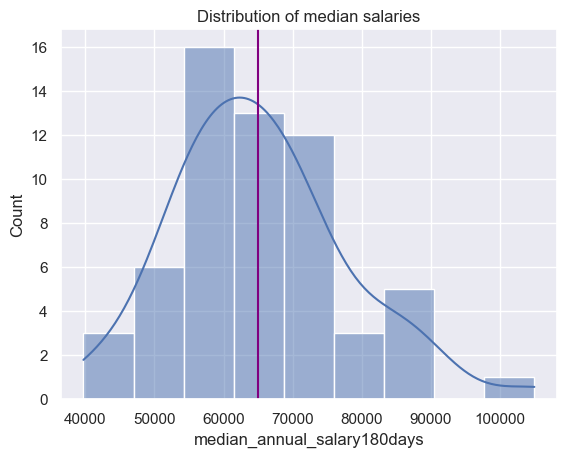

In [ ]:
#distribution of median salary 180 days after graduation (data after removing outlier in median salary)
xmedian = np.median(df['median_annual_salary180days'])
sns.histplot(data = df, x = 'median_annual_salary180days',kde=True)
plt.axvline(xmedian,c = "purple")
plt.title("Distribution of median salaries");

In [ ]:
q1 = df['employed_infield_180days'].quantile(0.25)
q3 = df['employed_infield_180days'].quantile(0.75)

iqr = q3 - q1
upper = q3 + (iqr * 2)
lower = q3 - (iqr * 2)

df = df[(df['employed_infield_180days'] > lower) & (df['employed_infield_180days'] < upper)]

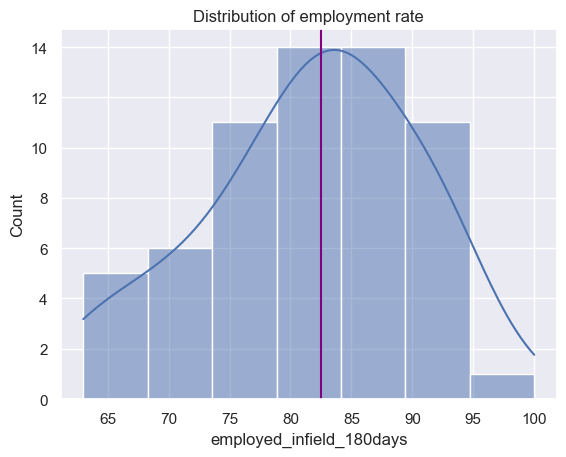

In [ ]:
#distribution of employment rate after graduation (data after removing outlier in employment rate)
xmedian = np.median(df['employed_infield_180days'])
sns.histplot(data = df, x = 'employed_infield_180days',kde=True)
plt.axvline(xmedian,c = "purple")
plt.title("Distribution of employment rate");

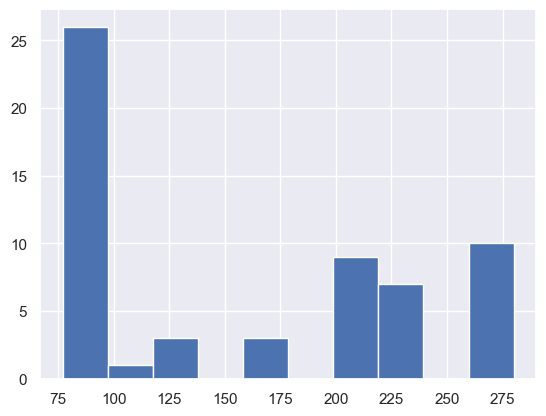

In [ ]:
df['course_length'].hist();

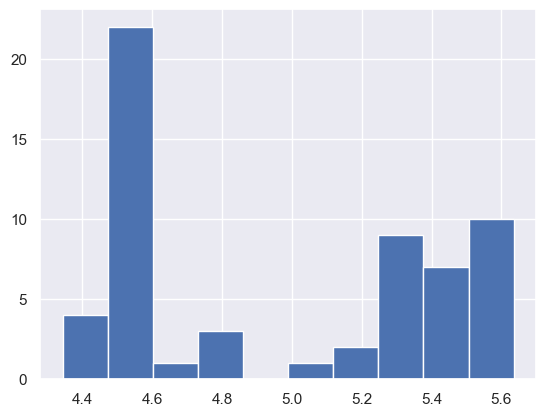

In [ ]:
#normalizing 'course_length' column with log normalization, plotting to see if there is a change in distribution
np.log(df['course_length']).hist();

### There is no point to do log normalization on course duration, we are keeping it the way it is

In [ ]:
df.to_csv("/Users/anastasiyaayala/Desktop/bootcamps_edu/data/data_normal.csv",index=False)